In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [5]:
# to import dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/Churn_Modelling.csv')

In [7]:
# to print variables in the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# to check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
# to check for duplicated values
duplicates = df[df.duplicated()]

In [13]:
duplicates

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [15]:
# to check data types of variables
# Dataset contains 10,000 bank customer records
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


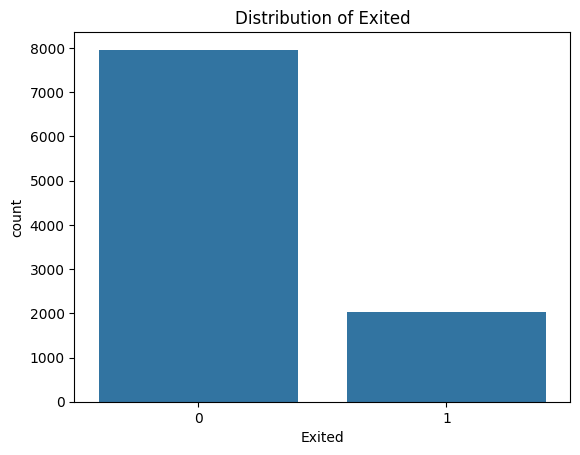

In [17]:
# to see distribution of target variable 'Exited'
sns.countplot(data=df, x='Exited')
plt.title('Distribution of Exited')
plt.show()

In [19]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [21]:
# 20% of the customers churned
100 * df['Exited'].value_counts()/len(df)

Exited
0    79.63
1    20.37
Name: count, dtype: float64

In [23]:
# youngest cust. = 18 years
# oldest cust. = 92 years
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

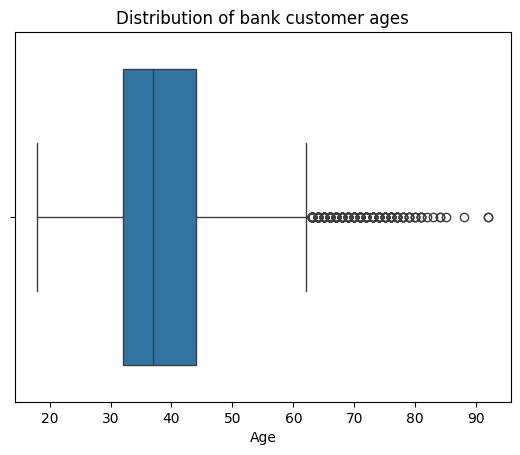

In [25]:
# Average age of customer = 39 years
sns.boxplot(data=df, x='Age')
plt.title('Distribution of bank customer ages')
plt.show()

In [27]:
# def custom for age categories
def age_categories(s):
    if 18 <= s <= 30:
        return "18 to 30"
    elif 31 <= s <= 43:
        return "31 to 43"
    elif 44 <= s <= 56:
        return "44 to 56"
    elif 57 <= s <= 69:
        return "57 to 69"
    elif 70 <= s <= 82:
        return "70 to 82"
    elif s >= 83:
        return "above 83"

In [29]:
# to create a new variable and apply custom function
df['age_categories'] = df['Age'].apply(age_categories)

In [31]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_categories
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,31 to 43
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,31 to 43
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,31 to 43
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,31 to 43
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,31 to 43


In [33]:
df['age_categories'].unique()

array(['31 to 43', '44 to 56', '18 to 30', '57 to 69', '70 to 82',
       'above 83'], dtype=object)

In [35]:
age_groups_order = ['18 to 30',
                    '31 to 43',
                    '44 to 56',
                    '57 to 69',
                    '70 to 82',
                   'above 83']

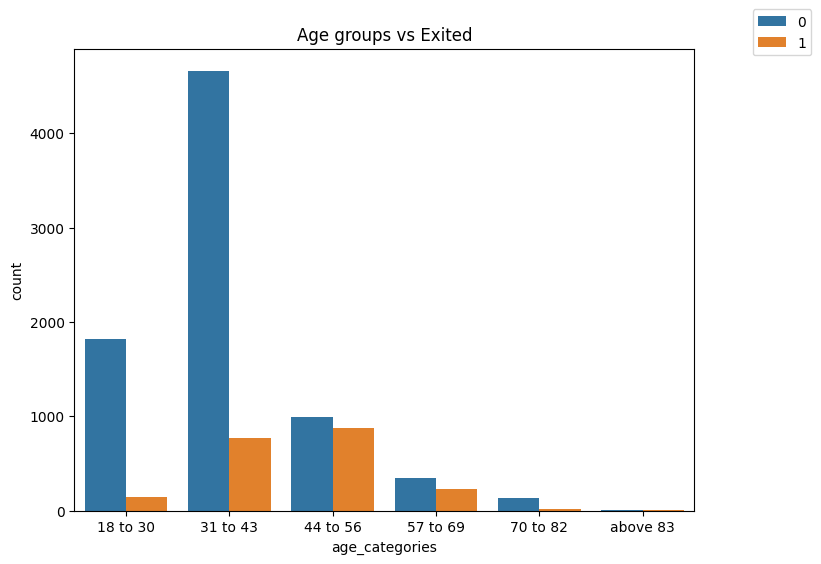

In [37]:
# Customers between 44 to 56 years churn the most, followed by age group: 31 to 43 years
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='age_categories', order=age_groups_order ,hue='Exited')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.title('Age groups vs Exited')
plt.show()

In [39]:
# to print categorical variables
df.select_dtypes('object')

,Surname,Geography,Gender,age_categories
0,Hargrave,France,Female,31 to 43
1,Hill,Spain,Female,31 to 43
2,Onio,France,Female,31 to 43
3,Boni,France,Female,31 to 43
4,Mitchell,Spain,Female,31 to 43
...,...,...,...,...
9995,Obijiaku,France,Male,31 to 43
9996,Johnstone,France,Male,31 to 43
9997,Liu,France,Female,31 to 43
9998,Sabbatini,Germany,Male,31 to 43


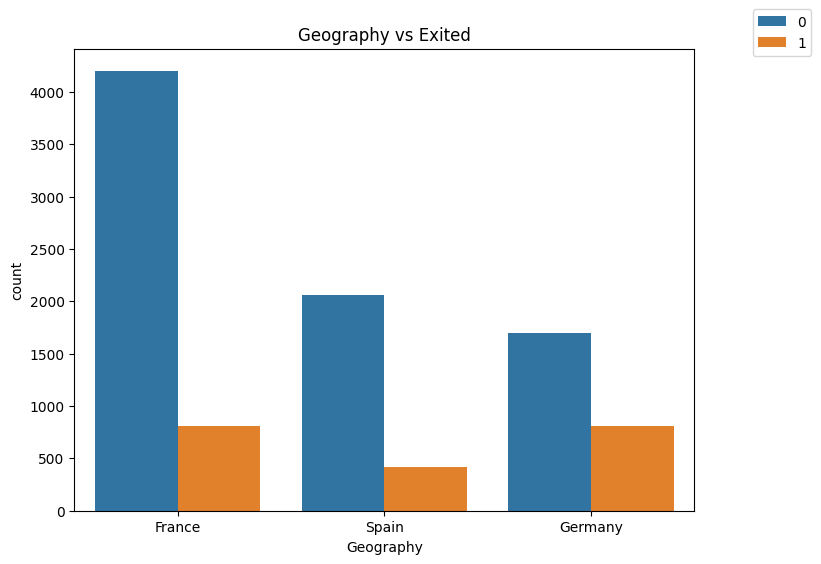

In [41]:
# Customers from Germany has the highest attrition rate
plt.figure(figsize=(8,6), dpi=100)
sns.countplot(data=df, x='Geography',hue='Exited')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.title('Geography vs Exited')
plt.show()

In [43]:
pd.DataFrame(df.groupby(['Geography','Exited'])['Exited'].count())

Exited
Geography Exited        
France    0         4204
          1          810
Germany   0         1695
          1          814
Spain     0         2064
          1          413

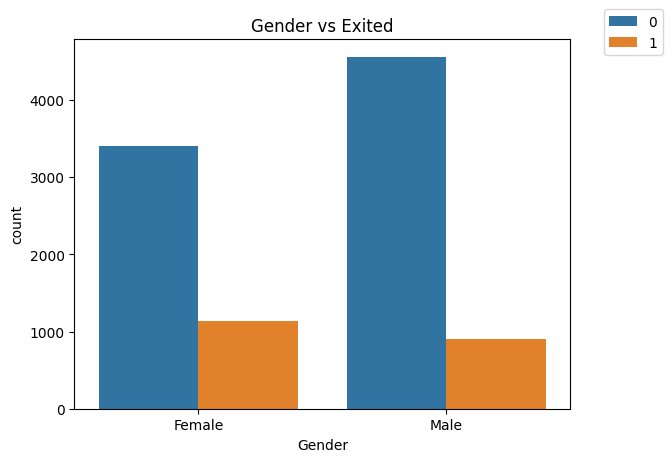

In [45]:
# Female customers has the highest attrition rate
sns.countplot(data=df, x='Gender',hue='Exited')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.title('Gender vs Exited')
plt.show()

In [47]:
# to print numeric variables
df.select_dtypes(['int','float'])

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,1


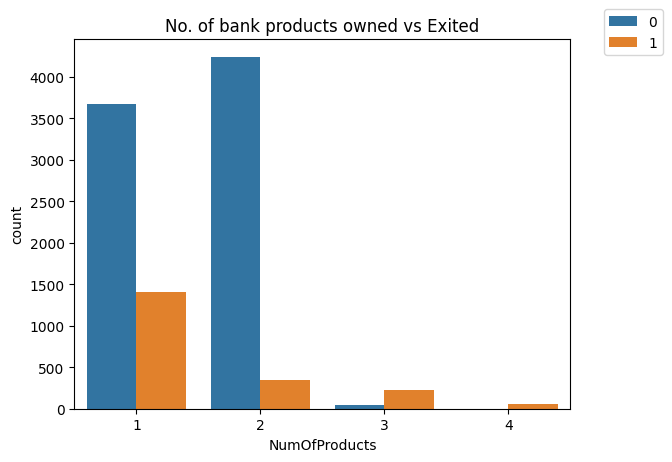

In [49]:
# Customers with only one bank product/ account own are most likely to churn
sns.countplot(data=df, x='NumOfProducts',hue='Exited')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.title('No. of bank products owned vs Exited')
plt.show()

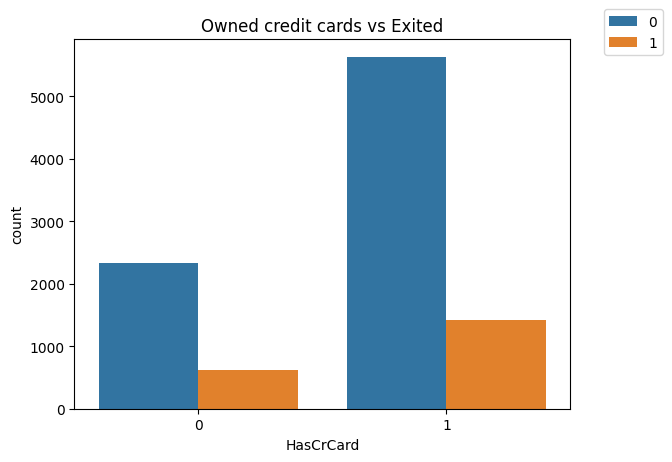

In [51]:
# customers who own credit cards are likely to churn
sns.countplot(data=df, x='HasCrCard',hue='Exited')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.title('Owned credit cards vs Exited')
plt.show()

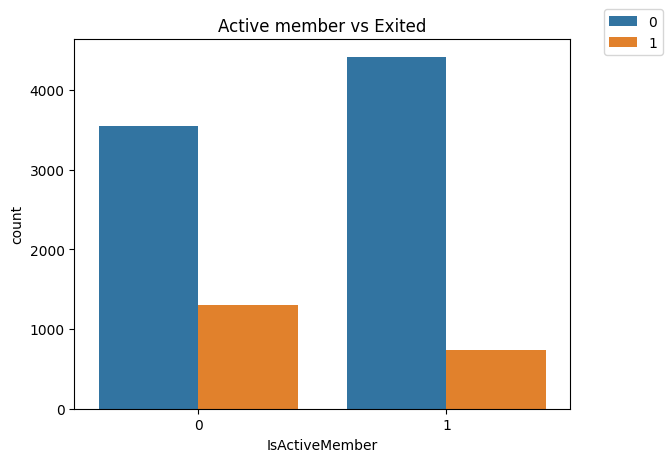

In [53]:
# Customers who are not active member are likely to churn
sns.countplot(data=df, x='IsActiveMember',hue='Exited')
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.title('Active member vs Exited')
plt.show()

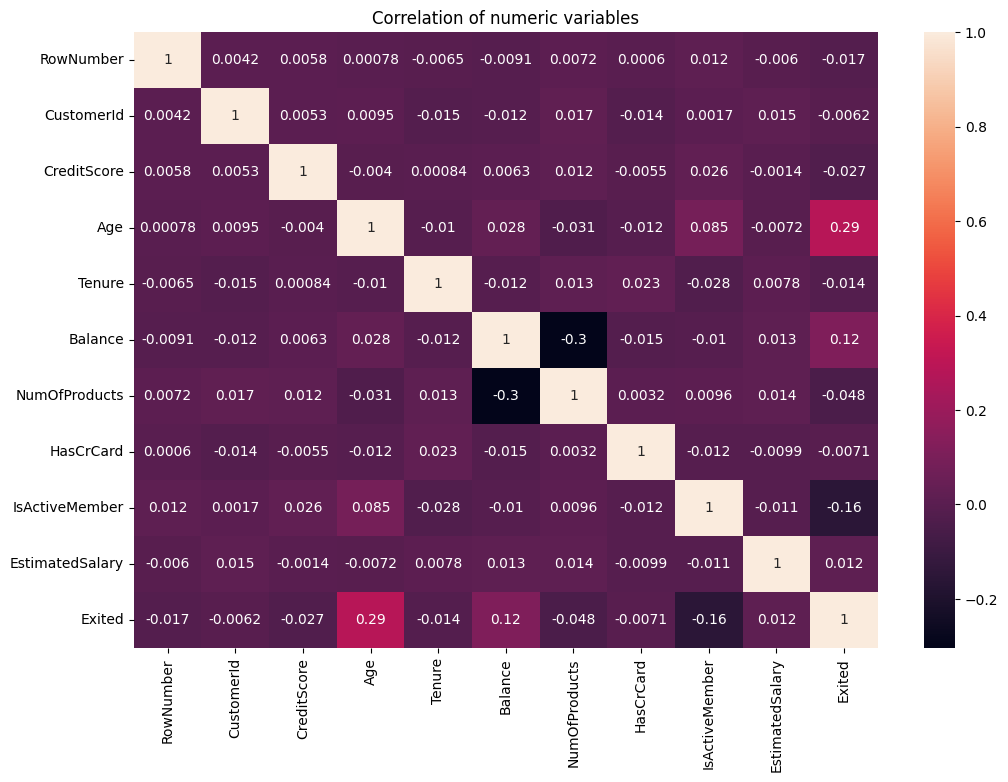

In [55]:
# to visualise correlations in heat map
plt.figure(figsize=(12,8), dpi=100)
sns.heatmap(df.select_dtypes(['int','float']).corr(), annot=True, cmap='rocket')
plt.title('Correlation of numeric variables')
plt.show()

In [57]:
# Age shows the highest correlation to churn, followed by bank account balance
df.select_dtypes(['int','float']).corr()['Exited'].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

In [59]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_categories
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,31 to 43
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,31 to 43
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,31 to 43
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,31 to 43
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,31 to 43


In [61]:
# to remove unimportant variables not useful for further analysis
df = df.drop(['RowNumber','CustomerId','Surname','Age'], axis=1)

In [63]:
# to define X and y
X = df.drop('Exited', axis=1)

In [94]:
# to convert categorical variables to numerics, drop_first = True - to remove multicollinearity against the variables
X = pd.get_dummies(X, drop_first=True)

In [96]:
X

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,age_categories_31 to 43,age_categories_44 to 56,age_categories_57 to 69,age_categories_70 to 82,age_categories_above 83
0,619,2,0.00,1,1,1,101348.88,False,False,False,True,False,False,False,False
1,608,1,83807.86,1,0,1,112542.58,False,True,False,True,False,False,False,False
2,502,8,159660.80,3,1,0,113931.57,False,False,False,True,False,False,False,False
3,699,1,0.00,2,0,0,93826.63,False,False,False,True,False,False,False,False
4,850,2,125510.82,1,1,1,79084.10,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,5,0.00,2,1,0,96270.64,False,False,True,True,False,False,False,False
9996,516,10,57369.61,1,1,1,101699.77,False,False,True,True,False,False,False,False
9997,709,7,0.00,1,0,1,42085.58,False,False,False,True,False,False,False,False
9998,772,3,75075.31,2,1,0,92888.52,True,False,True,True,False,False,False,False


In [98]:
y = df['Exited']

In [100]:
# to import all libraries necessary for predictive modelling
from sklearn.model_selection import train_test_split

In [102]:
from sklearn.preprocessing import StandardScaler

In [104]:
# testing set = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [106]:
scaler = StandardScaler()

In [150]:
# to scale, fit transform on the X train data to prevent data leakage to the y testing data
scaled_X_train = scaler.fit_transform(X_train)

In [152]:
scaled_X_test = scaler.transform(X_test)

In [112]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [114]:
from xgboost import XGBClassifier

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
from sklearn.linear_model import LogisticRegression

In [120]:
from sklearn.svm import SVC

In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score

In [126]:
from sklearn.model_selection import GridSearchCV

In [138]:
dt = DecisionTreeClassifier()

In [140]:
# to define the decision tree parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [142]:
# Set up GridSearchCV
dt_clf = GridSearchCV(estimator=dt, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2)

In [144]:
# Fit GridSearchCV
dt_clf.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [154]:
# Best parameters and score
print("Best parameters found: ", dt_clf.best_params_)
print("Best score found: ", dt_clf.best_score_)

Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score found:  0.8447500000000001


In [156]:
# AUC score for Decision Treet test prediction model = 0.723
best_model = dt_clf.best_estimator_
dt_test_pred = best_model.predict(scaled_X_test)
print("Decision Tree Classifier test AUC score: ", roc_auc_score(y_test, dt_test_pred))

Decision Tree Classifier test AUC score:  0.723296320781446


In [158]:
best_model = dt_clf.best_estimator_
dt_train_pred = best_model.predict(scaled_X_train)
print("Decision Tree Classifier train AUC score: ", roc_auc_score(y_train, dt_train_pred))

DT train AUC score:  0.7673997215873788


In [170]:
rf = RandomForestClassifier()

In [172]:
# Define parameter grid (Random Forest)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

In [174]:
# Set up GridSearchCV
rf_clf = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2)

In [176]:
# Fit the prediction model to training data
rf_clf.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [178]:
# Best parameters and score
print("Best parameters found: ", rf_clf.best_params_)
print("Best score found: ", rf_clf.best_score_)

Best parameters found:  {'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 300}
Best score found:  0.859625


In [180]:
# AUC score for Random Forest test prediction model = 0.725
best_model = rf_clf.best_estimator_
rf_test_pred = best_model.predict(scaled_X_test)
print("Random Fores Classifier test AUC score: ", roc_auc_score(y_test, rf_test_pred))

Random Fores Classifier test AUC score:  0.7251956688268565


In [182]:
best_model = rf_clf.best_estimator_
rf_train_pred = best_model.predict(scaled_X_train)
print("Random Forest Classifier train AUC score: ", roc_auc_score(y_train, rf_train_pred))

Random Forest Classifier train AUC score:  0.8169418581772161


In [184]:
print(classification_report(y_test, rf_test_pred)) # Random Forest classifier

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1577
           1       0.79      0.48      0.60       423

    accuracy                           0.86      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.86      0.85      2000



In [186]:
# Initialize the AdaBoost classifier
ada = AdaBoostClassifier()

In [188]:
# Define the parameter grid, Ada Boost
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1, 10],
    'algorithm': ['SAMME']
}

In [190]:
# Initialize GridSearchCV with 5-fold cross-validation
ada_clf = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [192]:
# Fit the model on the training data
ada_clf.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME'],
                         'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [194]:
# Print the best parameters and best score
print("Best Parameters:", ada_clf.best_params_)
print("Best Cross-Validation Accuracy:", ada_clf.best_score_)

Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 150}
Best Cross-Validation Accuracy: 0.8491249999999999


In [196]:
# AUC score for AdaBoost test model = 0.68
best_model = ada_clf.best_estimator_
ada_test_pred = best_model.predict(scaled_X_test)
print("AdaBoost Classifier test AUC score: ", roc_auc_score(y_test, ada_test_pred))

AdaBoost test AUC score:  0.6802784111436414


In [198]:
best_model = ada_clf.best_estimator_
ada_train_pred = best_model.predict(scaled_X_train)
print("AdaBoost Classifier train AUC score: ", roc_auc_score(y_train, ada_train_pred))

AdaBoost Classifier train AUC score:  0.6647436054162781


In [200]:
print(classification_report(y_test, ada_test_pred))   # AdaBoost Classifier

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1577
           1       0.76      0.39      0.52       423

    accuracy                           0.84      2000
   macro avg       0.81      0.68      0.71      2000
weighted avg       0.83      0.84      0.83      2000



In [202]:
# Initialize the Gradient Boosting classifier
gbc = GradientBoostingClassifier()

In [204]:
# Define the parameter grid, Gradient Boost classifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

In [206]:
# Initialize GridSearchCV with 5-fold cross-validation
gbc_clf = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [208]:
# Fit the model on the training data
gbc_clf.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [210]:
# Print the Gradient Boost best parameters and best score
print("Best Parameters:", gbc_clf.best_params_)
print("Best Cross-Validation Accuracy:", gbc_clf.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.859


In [216]:
# AUC score for Gradient Boost classifier test set = 0.728
best_model = gbc_clf.best_estimator_
gbc_test_pred = best_model.predict(scaled_X_test)
print("Gradient Boost classifier test AUC score:", roc_auc_score(y_test, gbc_test_pred))

Gradient Boost classifier test AUC score: 0.7277043972830478


In [218]:
best_model = gbc_clf.best_estimator_
gbc_train_pred = best_model.predict(scaled_X_train)
print("Gradient Boost classifier train AUC score:", roc_auc_score(y_train, gbc_train_pred))

Gradient Boost classifier train AUC score: 0.7317499828272114


In [220]:
print(classification_report(y_test, gbc_test_pred)) # Gradient Boost Classifier

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1577
           1       0.77      0.49      0.60       423

    accuracy                           0.86      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [222]:
# Initialize the XGBoost classifier
xgb = XGBClassifier()

In [224]:
# Define the parameter grid, XGBoost classifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'gamma': [0, 0.1, 0.2],
}

In [228]:
# Initialize GridSearchCV with 5-fold cross-validation
xgb_clf = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [230]:
# Fit the model on the training data
xgb_clf.fit(scaled_X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [232]:
# Print the best parameters and best score
print("Best Parameters:", xgb_clf.best_params_)
print("Best Cross-Validation Accuracy:", xgb_clf.best_score_)

Best Parameters: {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.860125


In [234]:
# AUC score for XGBoost classifier test score = 0.737
best_model = xgb_clf.best_estimator_
xgb_test_pred = best_model.predict(scaled_X_test)
print("XGBoost classifier AUC test score: ", roc_auc_score(y_test, xgb_test_pred))

XGBoost classifier AUC test score:  0.7367574066328773


In [236]:
best_model = xgb_clf.best_estimator_
xgb_train_pred = best_model.predict(scaled_X_train)
print("XGBoost classifier AUC train score: ", roc_auc_score(y_train, xgb_train_pred))

XGBoost classifier AUC train score:  0.727947422936869


In [238]:
print(classification_report(y_test, xgb_test_pred))  # XGBoost classifier

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1577
           1       0.77      0.52      0.62       423

    accuracy                           0.86      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.86      0.85      2000



In [240]:
# to create an instance of Logistic Regression
lr = LogisticRegression()

In [242]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength (to prevent over-fitting)
    'max_iter': [100,150]  # Maximum number of iterations
}

In [244]:
lr_clf = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

In [246]:
# Fit the grid search to the data
lr_clf.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 150]},
             verbose=2)

In [248]:
# Print the best parameters and best score
print("Best Parameters:", lr_clf.best_params_)
print("Best Cross-Validation Accuracy:", lr_clf.best_score_)

Best Parameters: {'C': 0.1, 'max_iter': 100}
Best Cross-Validation Accuracy: 0.829


In [250]:
# AUC score for Logistic Regression test score = 0.644
best_model = lr_clf.best_estimator_
lr_test_pred = best_model.predict(scaled_X_test)
print("Logistic Regression classifier AUC test score: ", roc_auc_score(y_test, lr_test_pred))

Logistic Regression classifier AUC test score:  0.6436076519590868


In [252]:
best_model = lr_clf.best_estimator_
lr_train_pred = best_model.predict(scaled_X_train)
print("Logistic Regression AUC train score: ", roc_auc_score(y_train, lr_train_pred))

Logistic Regression AUC train score:  0.6326243785293962


In [254]:
print(classification_report(y_test, lr_test_pred))  # Logistic Regression

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1577
           1       0.67      0.33      0.44       423

    accuracy                           0.82      2000
   macro avg       0.76      0.64      0.67      2000
weighted avg       0.81      0.82      0.80      2000



In [270]:
# Initialize the Support Vector Classifier
svc = SVC()

In [268]:
# help(SVC)

In [272]:
# Define the parameter grid, Support Vector
param_grid = {
    'C': [0.1, 1, 10],        # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'linear']    # Kernel type
}

In [274]:
# Initialize GridSearchCV with the model, parameter grid, and cross-validation
svc_clf = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

In [276]:
# Fit the grid search to the data
svc_clf.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [278]:
# Print the best parameters and best score
print("Best Parameters:", svc_clf.best_params_)
print("Best Cross-Validation Accuracy:", svc_clf.best_score_)

Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.8556250000000001


In [280]:
# AUC score for Support Vector classifier test score = 0.718
best_model = svc_clf.best_estimator_
svc_test_pred = best_model.predict(scaled_X_test)
print("Support Vector classifier AUC test score: ", roc_auc_score(y_test, svc_test_pred))

Support Vector classifier AUC test score:  0.717555552557374


In [282]:
# AUC score for Support Vector classifier train score = 0.706
best_model = svc_clf.best_estimator_
svc_train_pred = best_model.predict(scaled_X_train)
print("Support Vector classifier AUC train score: ", roc_auc_score(y_train, svc_train_pred))

Support Vector classifier AUC train score:  0.7062655646587505


In [284]:
print(classification_report(y_test, svc_test_pred))  # Support Vector Classifier

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1577
           1       0.79      0.47      0.59       423

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [286]:
# Initialize the K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

In [290]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],        # Number of neighbors to use
    'weights': ['uniform', 'distance'], # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski'] # Distance metric
}

In [292]:
# Initialize GridSearchCV with the model, parameter grid, and cross-validation
knn_clf = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

In [294]:
# Fit the grid search to the data
knn_clf.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [296]:
# Print the best parameters and best score
print("Best Parameters:", knn_clf.best_params_)
print("Best Cross-Validation Accuracy:", knn_clf.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.8342500000000002


In [298]:
# AUC score for K Nearest neighbor test score = 0.688
best_model = knn_clf.best_estimator_
knn_test_pred = best_model.predict(scaled_X_test)
print("KNN classifier AUC test score: ", roc_auc_score(y_test, knn_test_pred))

KNN classifier AUC test score:  0.6878045965122154


In [300]:
best_model = knn_clf.best_estimator_
knn_train_pred = best_model.predict(scaled_X_train)
print("KNN classifier AUC train score: ", roc_auc_score(y_train, knn_train_pred))

KNN classifier AUC train score:  0.690582151709653


In [302]:
print(classification_report(y_test, knn_test_pred))  # KNN classifier

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1577
           1       0.70      0.42      0.53       423

    accuracy                           0.84      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg       0.83      0.84      0.82      2000



In [304]:
# XGB Classifier has the highest AUC score = 0.737

In [310]:
best_model = xgb_clf.best_estimator_

In [312]:
xgb_feature_importances = best_model.feature_importances_

In [314]:
xgb_feature_importances

array([0.01448931, 0.01690952, 0.04175423, 0.17058215, 0.00983252,
       0.15296678, 0.01431964, 0.08129045, 0.01017274, 0.03983939,
       0.03960515, 0.26495862, 0.12532848, 0.01795097, 0.        ],
      dtype=float32)

In [320]:
pd.DataFrame(data= xgb_feature_importances, index = X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

,Importance
age_categories_44 to 56,0.264959
NumOfProducts,0.170582
IsActiveMember,0.152967
age_categories_57 to 69,0.125328
Geography_Germany,0.081290
Balance,0.041754
Gender_Male,0.039839
age_categories_31 to 43,0.039605
age_categories_70 to 82,0.017951
Tenure,0.016910


In [324]:
# to read into a new dataframe
xgb_imp = pd.DataFrame(data= xgb_feature_importances, index = X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

C:\Users\miche\AppData\Local\Temp\ipykernel_5460\2596964499.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_imp, y=xgb_imp.index, x='Importance', palette='viridis')


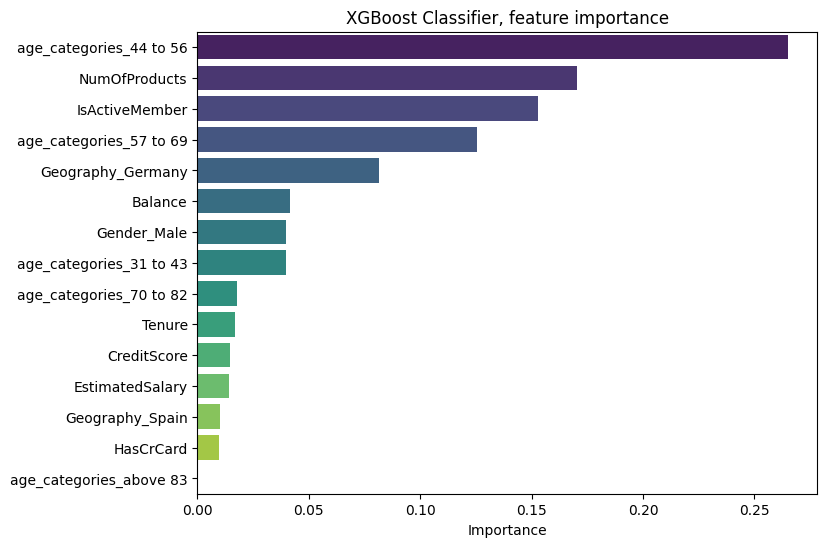

In [330]:
plt.figure(figsize=(8,6), dpi=100)
sns.barplot(data=xgb_imp, y=xgb_imp.index, x='Importance', palette='viridis')
plt.title('XGBoost Classifier, feature importance')
plt.ylabel("")
plt.show()

In [ ]:
# Predictors of customers' churn 1) 44 to 56 years, 2) No. of bank products owned, 3) Is customer an Active member, 4) 57 to 69 years
# 5) Germany customers